In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb # preprocessed set of 50,000 movie reviews labeled as positive (1) or negative (0).
from tensorflow.keras import models, layers, optimizers, losses, Input
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 3s 0us/step


In [5]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("\nSample Decoded Review:\n", decoded_review)


Sample Decoded Review:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what the

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [18]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
model = models.Sequential([
    Input(shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160016    
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 160,465
Trainable params: 160,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001), #controls how much the model's weights change with respect to the loss.
    loss='binary_crossentropy',#Measures how well the model is performing, and gives feedback
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    X_train,
    y_train,
    epochs=25, # Number of full passes over the training data
    batch_size=500,  # Process 500 samples at a time before updating weights
    validation_split=0.2,  # Automatically split 20% of the training data for validation (i.e., model will train on 80% and evaluate on 20% during training)
    shuffle=True  # Randomly shuffle the data before each epoch to prevent learning order-based patterns
)


Epoch 1/25
40/40 [==============================] - 1s 16ms/step - loss: 0.5652 - accuracy: 0.7714 - val_loss: 0.3873 - val_accuracy: 0.8682
Epoch 2/25
40/40 [==============================] - 0s 10ms/step - loss: 0.2836 - accuracy: 0.9012 - val_loss: 0.2812 - val_accuracy: 0.8894
Epoch 3/25
40/40 [==============================] - 0s 10ms/step - loss: 0.1858 - accuracy: 0.9352 - val_loss: 0.2818 - val_accuracy: 0.8902
Epoch 4/25
40/40 [==============================] - 0s 10ms/step - loss: 0.1390 - accuracy: 0.9528 - val_loss: 0.3065 - val_accuracy: 0.8902
Epoch 5/25
40/40 [==============================] - 0s 10ms/step - loss: 0.1063 - accuracy: 0.9652 - val_loss: 0.3377 - val_accuracy: 0.8864
Epoch 6/25
40/40 [==============================] - 0s 11ms/step - loss: 0.0794 - accuracy: 0.9778 - val_loss: 0.3827 - val_accuracy: 0.8826
Epoch 7/25
40/40 [==============================] - 0s 10ms/step - loss: 0.0610 - accuracy: 0.9851 - val_loss: 0.4347 - val_accuracy: 0.8750
Epoch 8/25
40

In [ ]:
pred_probs = model.predict(X_test)
y_pred = (pred_probs > 0.5).astype("int32").flatten() #convert [.55 ,.83. 02. .94]  to [1. 1. 0.1]

782/782 [==============================] - 1s 1ms/step


In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.85196


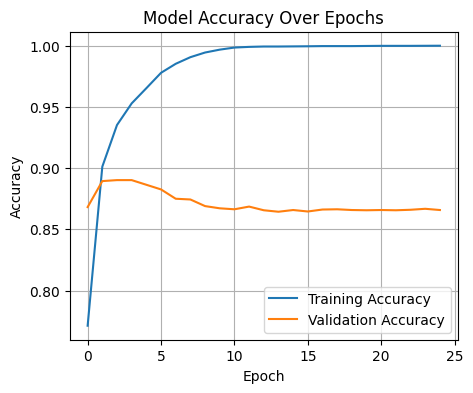

In [43]:


# Plot training & validation accuracy values
plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Shows how well the model has learned from the data it was trained on.

# Tells you how well your model generalizes to new, unseen data.